In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [24]:
if os.name == "posix":

    sns.set(font="AppleGothic")
elif os.name == "nt":

    sns.set(font="Malgun Gothic")
    

%config InlineBackend.figure_format = 'retina'

In [25]:
df = pd.read_csv("230127/경찰청_사이버 금융범죄 현황_20211231 (1).csv", encoding="cp949")
df

,연도,구분,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,2021,발생건수,2731,29,1336,12,3026,16505,4484
1,2021,검거건수,532,10,99,5,718,3567,1459
2,2020,발생건수,1519,29,822,9,2583,12402,2884
3,2020,검거건수,388,16,43,6,519,2873,776
4,2019,발생건수,2874,45,207,11,1824,2756,2825
5,2019,검거건수,984,39,32,3,478,811,1040
6,2018,발생건수,1978,191,293,11,1406,0,1742
7,2018,검거건수,936,100,174,5,281,0,857
8,2017,발생건수,545,1933,667,12,1234,0,1675
9,2017,검거건수,354,946,83,6,334,0,909


In [26]:
pd.isna(df)

,연도,구분,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [27]:
df1 = df[df["구분"] == "발생건수"]
df1 = df1.reset_index(drop=True)
df1

,연도,구분,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,2021,발생건수,2731,29,1336,12,3026,16505,4484
1,2020,발생건수,1519,29,822,9,2583,12402,2884
2,2019,발생건수,2874,45,207,11,1824,2756,2825
3,2018,발생건수,1978,191,293,11,1406,0,1742
4,2017,발생건수,545,1933,667,12,1234,0,1675


In [28]:
df2=df[df["구분"]=="검거건수"]
df2 = df2.reset_index(drop=True)
df2

,연도,구분,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,2021,검거건수,532,10,99,5,718,3567,1459
1,2020,검거건수,388,16,43,6,519,2873,776
2,2019,검거건수,984,39,32,3,478,811,1040
3,2018,검거건수,936,100,174,5,281,0,857
4,2017,검거건수,354,946,83,6,334,0,909


In [29]:
df1=df1[["연도","피싱","파밍","스미싱","메모리해킹",
         "몸캠피싱","메신저이용사기","(사이버금융)기타"]]
df1

,연도,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,2021,2731,29,1336,12,3026,16505,4484
1,2020,1519,29,822,9,2583,12402,2884
2,2019,2874,45,207,11,1824,2756,2825
3,2018,1978,191,293,11,1406,0,1742
4,2017,545,1933,667,12,1234,0,1675


In [30]:
df2=df2[["연도","피싱","파밍","스미싱","메모리해킹",
         "몸캠피싱","메신저이용사기","(사이버금융)기타"]]
df2

,연도,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,2021,532,10,99,5,718,3567,1459
1,2020,388,16,43,6,519,2873,776
2,2019,984,39,32,3,478,811,1040
3,2018,936,100,174,5,281,0,857
4,2017,354,946,83,6,334,0,909


In [31]:
result = df2.div(df1)
result

,연도,피싱,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기,(사이버금융)기타
0,1.0,0.194800,0.344828,0.074102,0.416667,0.237277,0.216116,0.325379
1,1.0,0.255431,0.551724,0.052311,0.666667,0.200929,0.231656,0.269071
2,1.0,0.342380,0.866667,0.154589,0.272727,0.262061,0.294267,0.368142
3,1.0,0.473205,0.523560,0.593857,0.454545,0.199858,NaN,0.491963
4,1.0,0.649541,0.489395,0.124438,0.500000,0.270665,NaN,0.542687


In [32]:
df1.rename(columns={df1.columns[1] : "전화사기"}, inplace=True)
del df1["(사이버금융)기타"]
df1

C:\Users\minjk\AppData\Local\Temp\ipykernel_12080\64745451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={df1.columns[1] : "전화사기"}, inplace=True)


,연도,전화사기,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기
0,2021,2731,29,1336,12,3026,16505
1,2020,1519,29,822,9,2583,12402
2,2019,2874,45,207,11,1824,2756
3,2018,1978,191,293,11,1406,0
4,2017,545,1933,667,12,1234,0


In [33]:
df2.rename(columns={df2.columns[1] : "전화사기"}, inplace=True)
del df2["(사이버금융)기타"]
df2

C:\Users\minjk\AppData\Local\Temp\ipykernel_12080\2239381479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={df2.columns[1] : "전화사기"}, inplace=True)


,연도,전화사기,파밍,스미싱,메모리해킹,몸캠피싱,메신저이용사기
0,2021,532,10,99,5,718,3567
1,2020,388,16,43,6,519,2873
2,2019,984,39,32,3,478,811
3,2018,936,100,174,5,281,0
4,2017,354,946,83,6,334,0


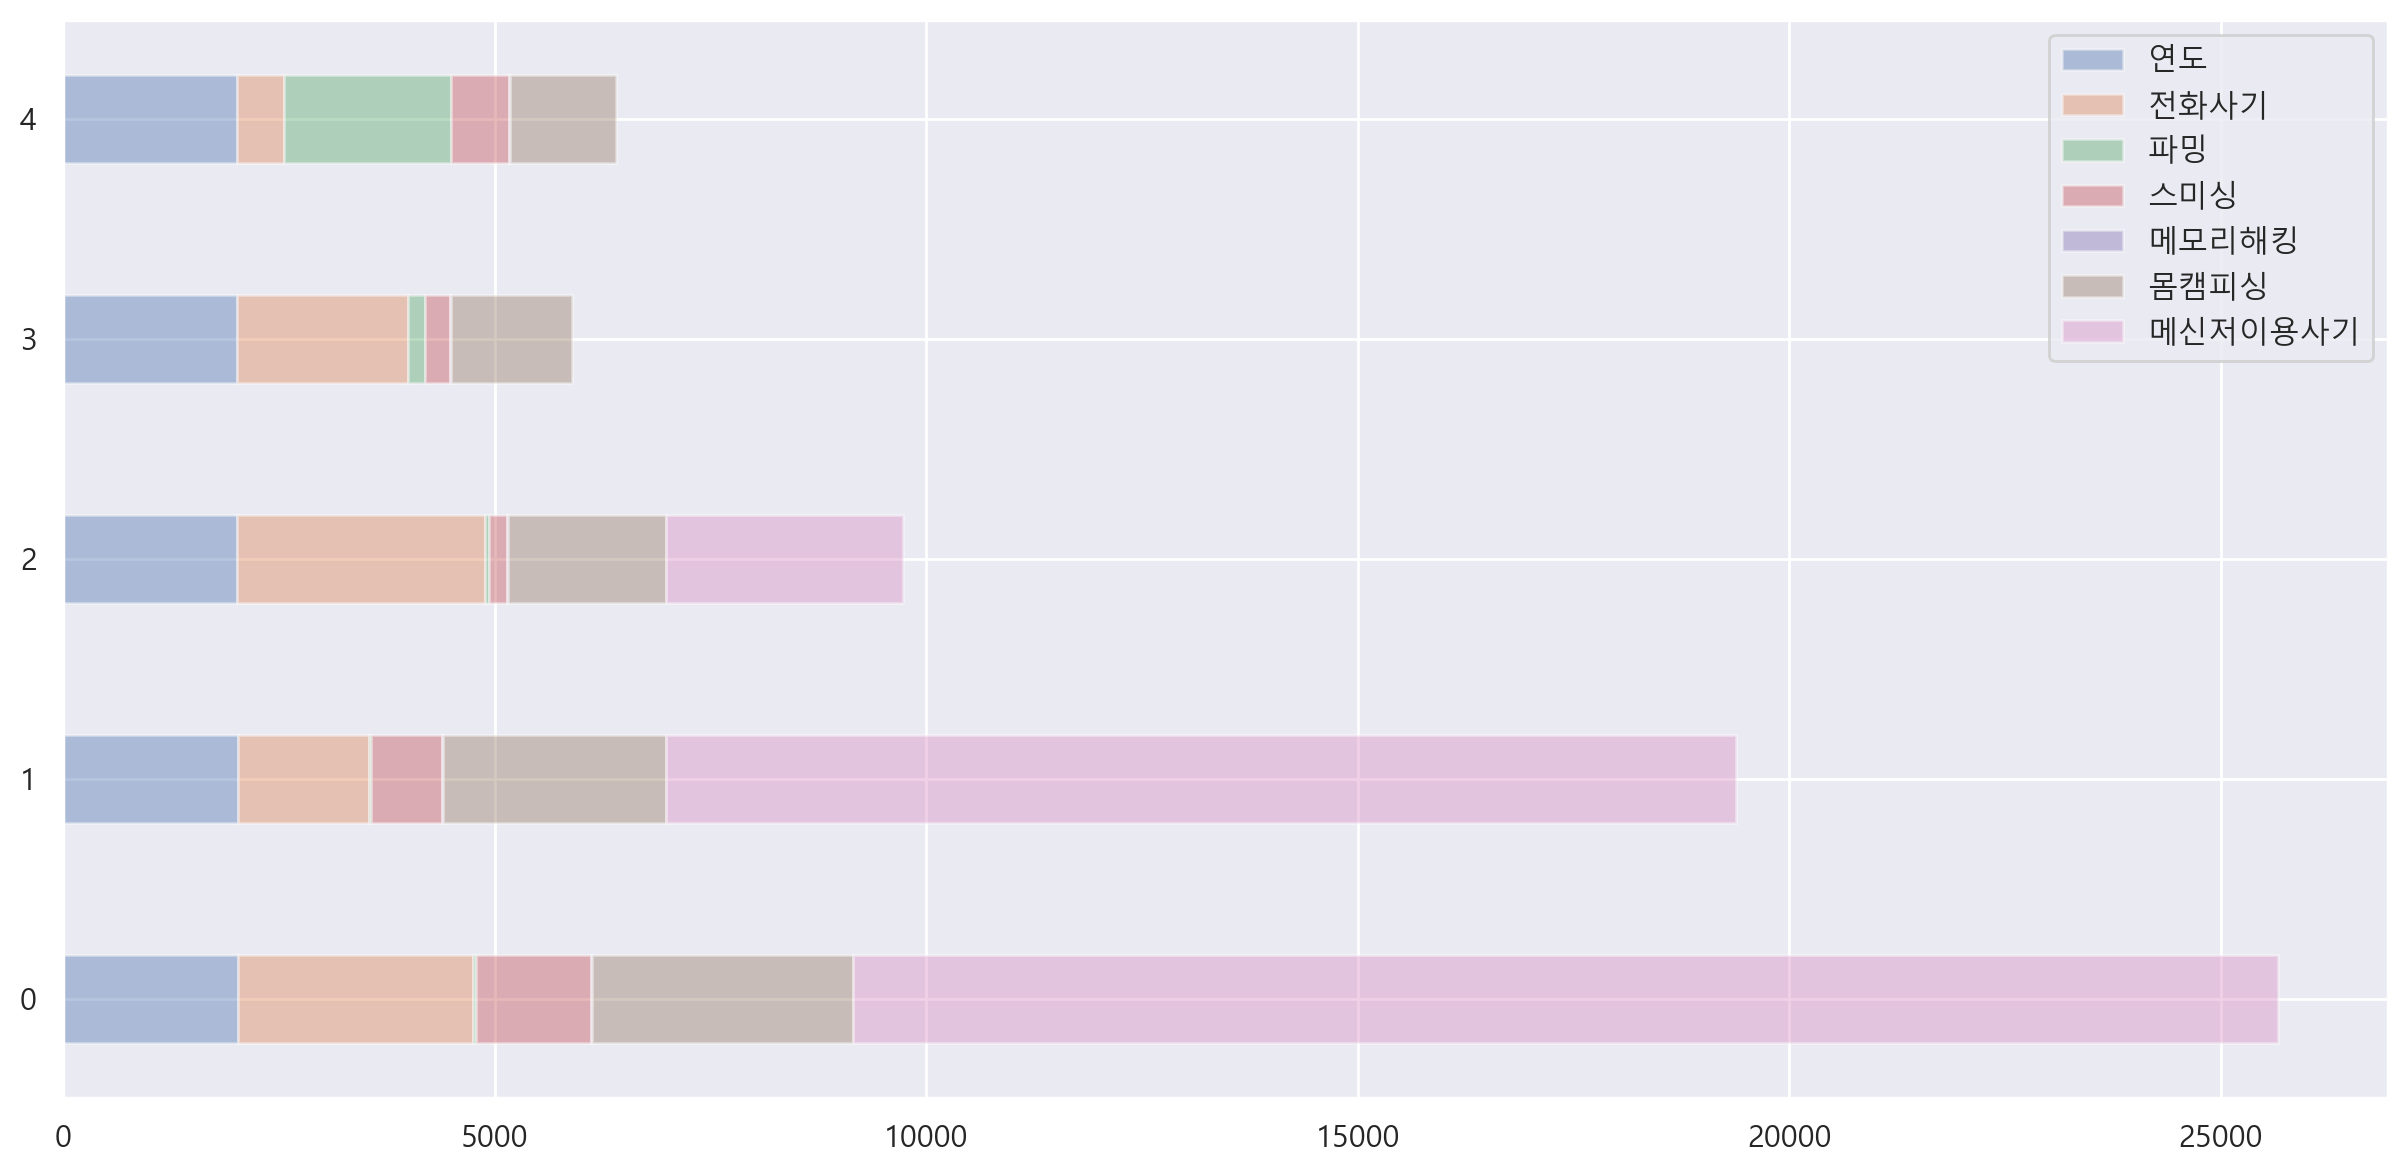

In [35]:
bar = df1.plot.barh(stacked=True, figsize=(15,7), alpha = 0.4, width = 0.4)

plt.show()

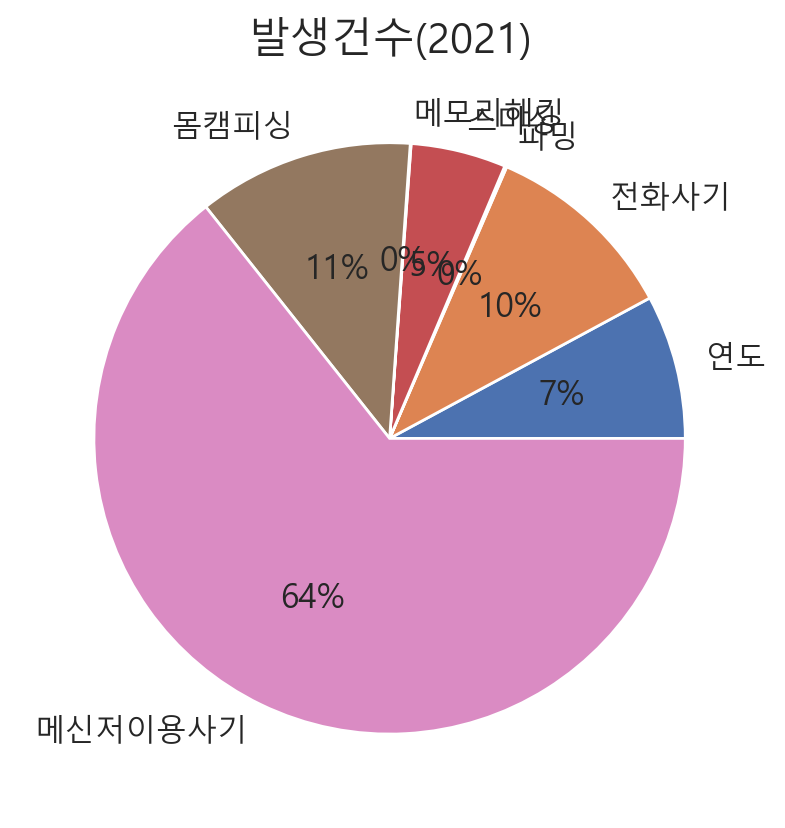

In [48]:
plt.pie(df1.loc[0], labels = df1.columns, autopct = '%.d%%')
plt.title('발생건수(2021)', size = 15)
plt.show()

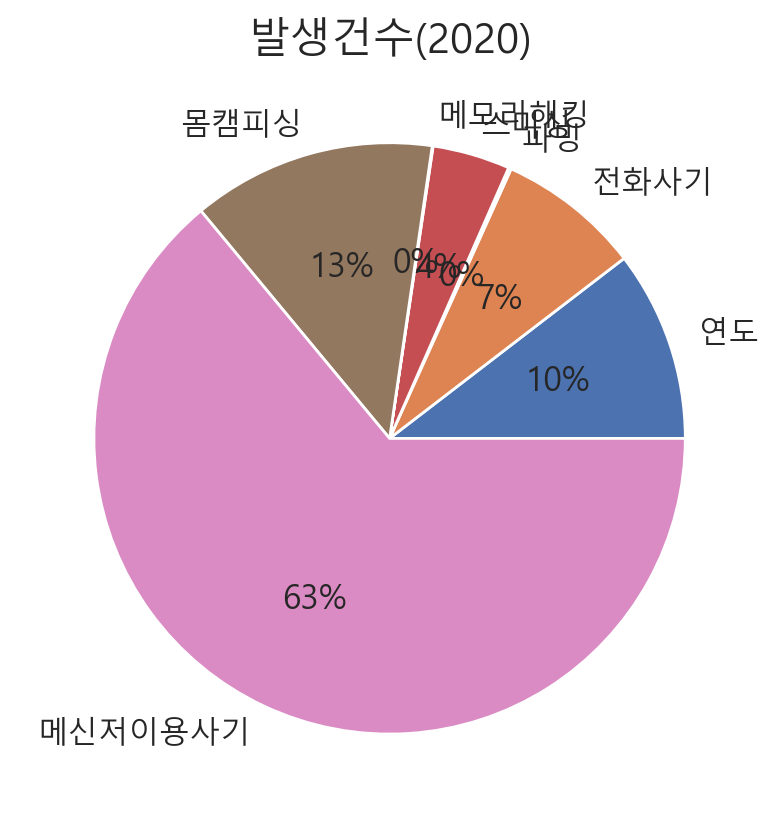

In [49]:
plt.pie(df1.loc[1], labels = df1.columns, autopct = '%.d%%')
plt.title('발생건수(2020)', size = 15)
plt.show()

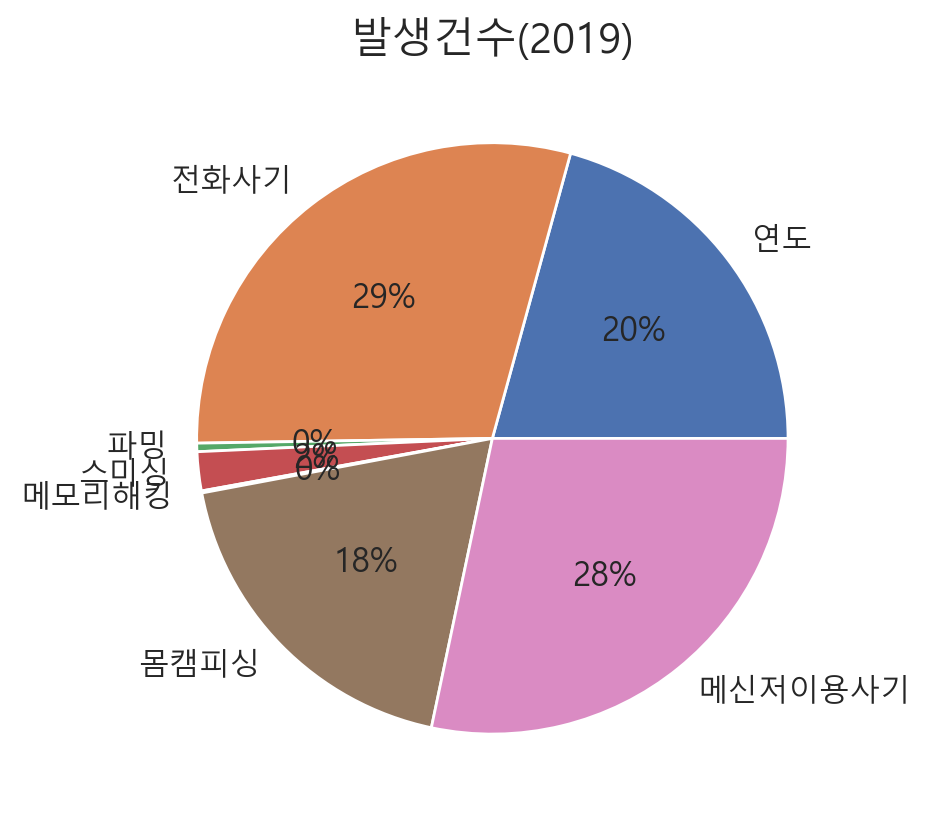

In [50]:
plt.pie(df1.loc[2], labels = df1.columns, autopct = '%.d%%')
plt.title('발생건수(2019)', size = 15)
plt.show()

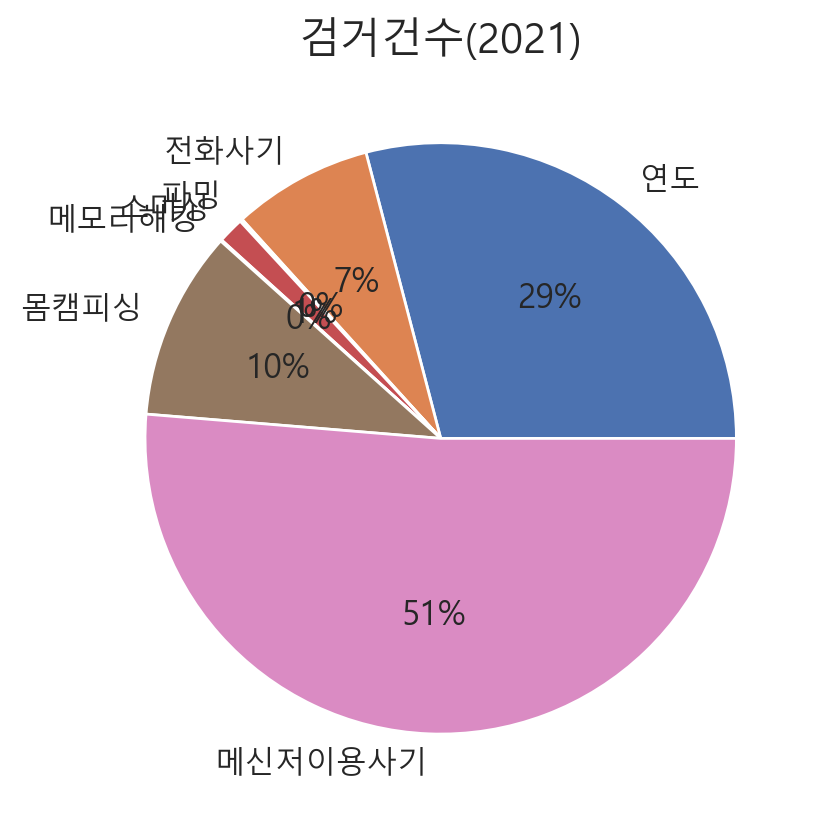

In [52]:
plt.pie(df2.loc[0], labels = df1.columns, autopct = '%.d%%')
plt.title('검거건수(2021)', size = 15)
plt.show()

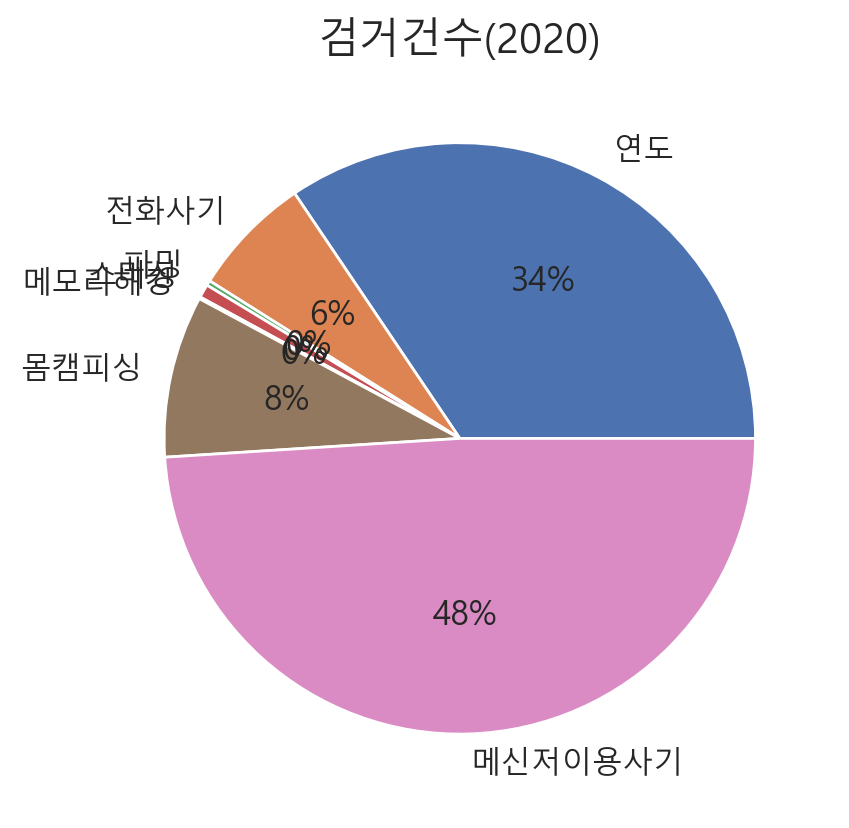

In [53]:
plt.pie(df2.loc[1], labels = df1.columns, autopct = '%.d%%')
plt.title('검거건수(2020)', size = 15)
plt.show()

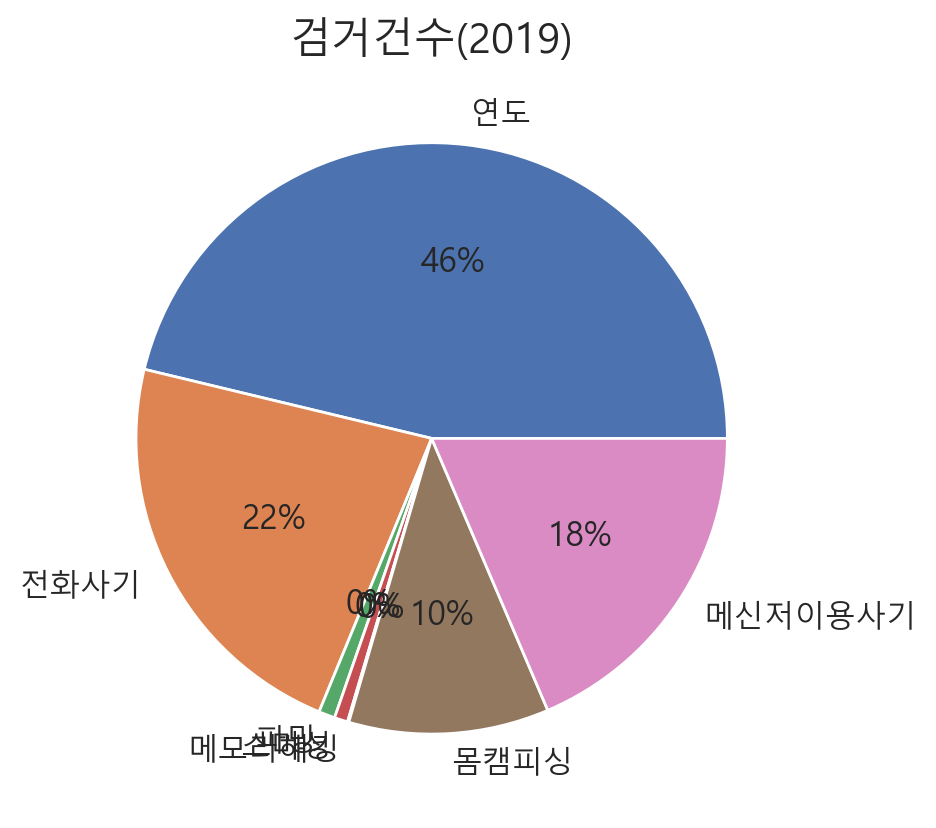

In [54]:
plt.pie(df2.loc[2], labels = df1.columns, autopct = '%.d%%')
plt.title('검거건수(2019)', size = 15)
plt.show()